In [1]:
%matplotlib inline

from pyvis.network import Network
import networkx as nx
from sympy.functions.combinatorial.numbers import nC
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import linalg
import numpy as np

[1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
36


<BarContainer object of 11 artists>

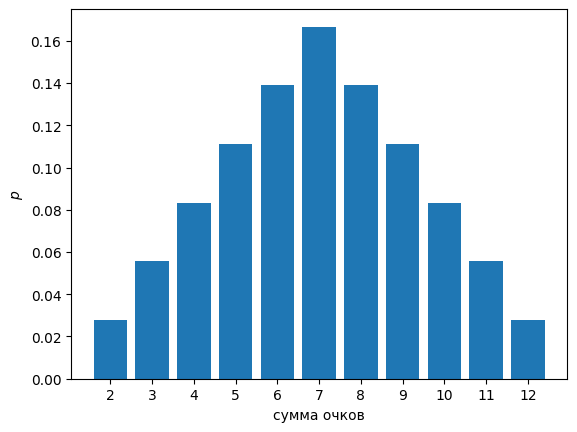

In [8]:
# распределение для суммы очков при бросании двух кубиков
distr = [0 for i in range(11)]

def convert_to_list_ind(num: int):
    """переводит полученную сумму n в индекс массива distr
    """
    return num - 2

for i in range(1, 6 + 1):
    for j in range(1, 6 + 1):
        s = i + j
        distr[convert_to_list_ind(s)] += 1

# выводим распределение, проверяем сумму
print(distr)
print(sum(distr))

# нормируем
s = sum(distr)
distr = list(map(lambda x: x / s, distr))

# отрисовка распределения
plt.style.use('default')
fig, ax = plt.subplots()
#ax.set_title('Распределение суммы очков при бросании двух костей')
ax.set_xticks(range(2, 12 + 1))
ax.set_xlabel('сумма очков')
ax.set_ylabel('$p$')
ax.bar(range(2, 12 + 1), distr)

In [3]:
# задаём стох граф игры
game_chain = nx.DiGraph()
# вершины
game_chain.add_nodes_from(range(40))
# рёбра с вероятностными весами
for cur_node in range(40):
    # случай "идти в тюрьму"
    if cur_node == 30:
        game_chain.add_weighted_edges_from([(cur_node, 10, 1)])
        continue

    # составляем список рёбер
    cur_edges = []
    for next_neighb in range(cur_node + 1, cur_node + 12):
        # индекс для массива distr
        neighb_ind = next_neighb - cur_node - 1
        cur_edges.append((cur_node, next_neighb % 40, distr[neighb_ind]))

    game_chain.add_weighted_edges_from(cur_edges)

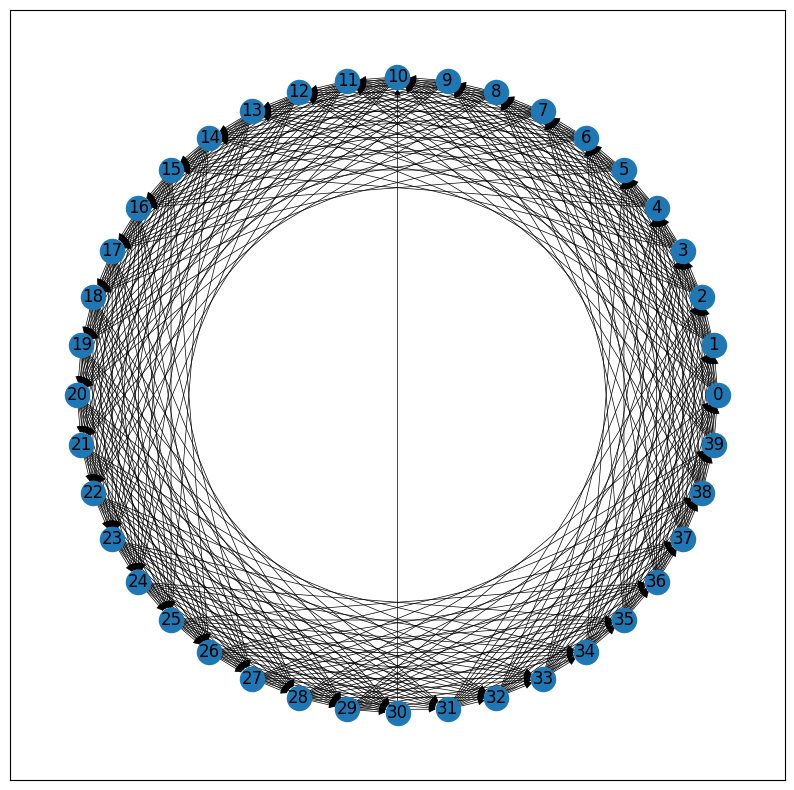

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
#ax.set_title('Граф ДЦМ для Монополии')
nx.draw_networkx(game_chain, arrows=True, pos=nx.circular_layout(game_chain), ax=ax, width=0.5)

array([[0.        , 0.02777778, 0.05555556, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02777778, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08333333, 0.11111111, 0.13888889, ..., 0.        , 0.02777778,
        0.05555556],
       [0.05555556, 0.08333333, 0.11111111, ..., 0.        , 0.        ,
        0.02777778],
       [0.02777778, 0.05555556, 0.08333333, ..., 0.        , 0.        ,
        0.        ]])

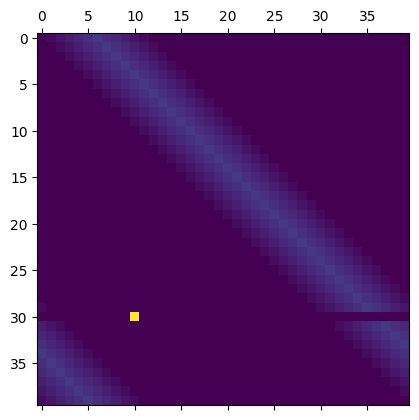

In [5]:
# матрица смежности графа
graph_mat = nx.to_numpy_array(game_chain)
# отобразим её
plt.matshow(graph_mat)
graph_mat

In [6]:
# найдём единственное стационарное состояние(очев? - да)
mat_axis = graph_mat.shape[0]
stationary_distr = linalg.null_space(graph_mat - 1 * np.diag(np.ones(mat_axis)))
stationary_distr = stationary_distr[:, 0]
stationary_distr = stationary_distr / linalg.norm(stationary_distr, ord=1)
print(stationary_distr)
print(linalg.norm(stationary_distr, ord=1))
print(np.size(stationary_distr))

[0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025]
1.0
40


In [ ]:
# расчитаем матожидание независимых от сложившихся обстоятельств карточек Шанс
num_players = 2
community_chest = 200 + 25*2 + 100 + 25 - 50 + 10 + 50 - 100 + 100 + 10 * num_players - 10 - 50
chance = -15 + 150 + 50 - 20 - 150 + 100
# такой учёт карточек выйти из тюрьмы
out_of_jail = 2 * 50
# карточки отправляйся в тюрьму
to_jail = 2 * (-50)


community_chest += 10 * num_players